# Check Upper  Colorado use-case output.

This a subset of the NHM prepped from a Bandit pull by Parker Norton.  Using this as a
test case for forecasting.

In [6]:
import geopandas as gpd
import requests
import pandas as pd
import xarray as xr

In [3]:
root_dir = '/mnt/d/oNHM/NHM_PRMS_UC_GF_1_1/'

In [16]:
gdf = gpd.read_file(root_dir + "GIS/model_nhru.shp")
gdf_sorted = gdf.sort_values(by="nhm_id")
gdf_sorted

,nhm_id,model_hru_,geometry
229,83028,1,"POLYGON ((-1118385.291 1478324.896, -1118624.9..."
230,83029,2,"POLYGON ((-1121505.257 1496167.102, -1121748.6..."
231,83030,3,"POLYGON ((-1030167.145 1495244.976, -1030395.2..."
232,83031,4,"POLYGON ((-1040025.238 1511655.184, -1039694.9..."
233,83032,5,"MULTIPOLYGON (((-1043009.834 1502805.016, -104..."
...,...,...,...
3718,86902,3847,"POLYGON ((-1103475.117 2318354.978, -1103505.0..."
3719,86903,3848,"POLYGON ((-1109984.970 2320514.993, -1109985.0..."
3720,86904,3849,"POLYGON ((-1102664.907 2320514.833, -1102454.7..."
3721,86905,3850,"POLYGON ((-1112025.268 2324684.918, -1111784.6..."


<Axes: >

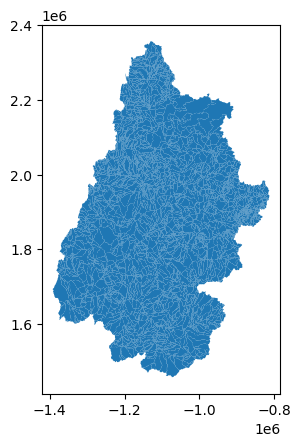

In [17]:
gdf_sorted.plot()

In [18]:
tmax = xr.open_dataset('../daily/output/2023-01-08_tmaxf.nc')
tmax

<xarray.Dataset> Size: 324kB
Dimensions:  (time: 8, hruid: 3851)
Coordinates:
  * time     (time) datetime64[ns] 64B 2023-01-01T05:00:00 ... 2023-01-08T05:...
  * hruid    (hruid) int32 15kB 1 2 3 4 5 6 7 ... 3846 3847 3848 3849 3850 3851
Data variables:
    hru_lat  (hruid) float64 31kB ...
    hru_lon  (hruid) float64 31kB ...
    tmaxf    (time, hruid) float64 246kB ...
Attributes:
    conventions:  CF-1.8
    featureType:  timeSeries
    history:      2024-03-20 00:54:58.006058,nhm,prms_outputs2_ncf.py

In [19]:
tmax.tmaxf.isel(time=0).values

array([18.4257, 42.3   , 40.2   , ..., 19.5396, 16.3   , 17.5   ])

In [20]:
gdf_sorted["tmaxf"] = tmax.tmaxf.isel(time=0).values

<Axes: >

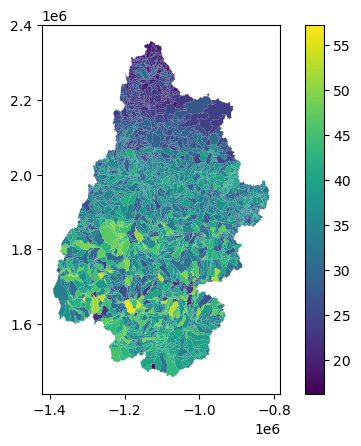

In [27]:
gdf_sorted.plot(column="tmaxf", legend=True)

In [22]:
gm_tmax = xr.open_dataset('../daily/input/filled_converted_2023_01_08.nc')
gm_tmax

<xarray.Dataset> Size: 2MB
Dimensions:   (time: 8, nhru: 3851)
Coordinates:
  * time      (time) datetime64[ns] 64B 2023-01-01 2023-01-02 ... 2023-01-08
  * nhru      (nhru) int64 31kB 83028 83029 83030 83031 ... 86904 86905 86906
    lat       (nhru) float64 31kB ...
    lon       (nhru) float64 31kB ...
Data variables:
    tmax      (time, nhru) float64 246kB ...
    crs       float64 8B ...
    tmin      (time, nhru) float64 246kB ...
    prcp      (time, nhru) float64 246kB ...
    rhmax     (time, nhru) float64 246kB ...
    rhmin     (time, nhru) float64 246kB ...
    ws        (time, nhru) float64 246kB ...
    humidity  (time, nhru) float64 246kB ...
Attributes:
    Conventions:  CF-1.8
    featureType:  timeSeries
    history:      2024_03_20_00_54_50 Original filec created  by gdptools pac...

In [28]:
gdf_sorted["gm_tmax"] = (gm_tmax.tmax.isel(time=0).values * 1.8) + 32

<Axes: >

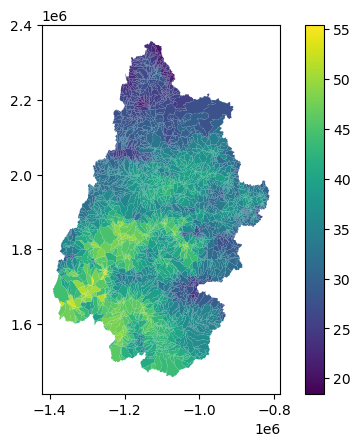

In [29]:
gdf_sorted.plot(column="gm_tmax", legend=True)

In [4]:
invalid_geometries = gdf[~gdf.is_valid]
print(f"Found {len(invalid_geometries)} invalid geometries.")

Found 177 invalid geometries.


In [5]:
gdf['geometry'] = gdf.buffer(0)

In [6]:
gdf.crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
gdf = gdf.to_crs("EPSG:4326")
gdf

,nhm_id,model_hru_,geometry
0,83301,274,"POLYGON ((-110.99899 36.58611, -111.00061 36.5..."
1,83302,275,"POLYGON ((-111.11099 36.69969, -111.11049 36.6..."
2,83359,332,"POLYGON ((-110.93996 36.75837, -110.94202 36.7..."
3,83364,337,"POLYGON ((-111.20558 36.84119, -111.20403 36.8..."
4,83366,339,"POLYGON ((-111.22911 36.84524, -111.22967 36.8..."
...,...,...,...
3846,86611,3556,"POLYGON ((-110.99459 40.41116, -110.99353 40.4..."
3847,86615,3560,"POLYGON ((-110.99662 40.49742, -110.99808 40.4..."
3848,86686,3631,"POLYGON ((-110.74581 39.88584, -110.74506 39.8..."
3849,86691,3636,"POLYGON ((-110.87315 39.87450, -110.87142 39.8..."


## Step 2: Sort the DataFrame by 'nhm_id'
Looks like data are sorted already but we'll sort anyway. CBH data supplied to this model should be sorted by nhm_id.

In [8]:
gdf_sorted = gdf.sort_values(by="nhm_id")

## Step 3: Export "nhm_id" to a file

In [9]:
gdf_sorted['nhm_id'].to_csv(root_dir + 'daily/input/nhm_id', index=False, header=False)

## Step 4: Calculate and write hru centroids.

In [10]:
centroids = gdf_sorted.to_crs(5070).geometry.centroid
centroids_ll = centroids.to_crs(4326)
lats = centroids_ll.y
lons = centroids_ll.x
lats.to_csv(root_dir + 'daily/input/hru_lat.txt', index=False, header=False)
lons.to_csv(root_dir + 'daily/input/hru_lon.txt', index=False, header=False)

In [21]:
points = list(zip(lons, lats))
points[-10:]

[(-109.62181340109326, 42.67709827954675),
 (-109.59178752024967, 42.65613676844921),
 (-109.81231608672125, 42.97729605771425),
 (-109.81068824830739, 42.98645822426993),
 (-109.69921741978114, 43.16469746353956),
 (-109.72782279994864, 43.1098871029577),
 (-109.76548123574867, 43.120069767784976),
 (-109.68778919598705, 43.1537152300935),
 (-109.80477414799824, 43.17723475172029),
 (-109.8228574876643, 43.18968847824578)]

## 5 Get elevations - used for calculating humidity from cfsv2 data.

In [22]:
import py3dep
elevation = py3dep.elevation_bycoords(points, crs="epsg:4326", source="tep")

In [28]:
df = pd.DataFrame(elevation)
df.to_csv(root_dir + '/daily/input/elevation', index=False, header=False)

## Repeat for segments

In [14]:
gdf = gpd.read_file(root_dir + "GIS/model_nsegment.shp")
gdf

,nhm_seg,model_seg_,geometry
0,42706,1,"LINESTRING (-840513.813 1962765.750, -840463.4..."
1,42707,2,"LINESTRING (-893201.427 1985197.890, -893186.9..."
2,42708,3,"LINESTRING (-855004.607 1970874.926, -855042.8..."
3,42709,4,"LINESTRING (-865168.318 1972729.691, -865089.6..."
4,42710,5,"LINESTRING (-881519.930 1968345.969, -881533.8..."
...,...,...,...
1937,44658,1938,"LINESTRING (-1202301.007 1565413.836, -1202326..."
1938,44659,1939,"LINESTRING (-1206408.194 1562910.585, -1206329..."
1939,44660,1940,"LINESTRING (-1206307.558 1541303.007, -1206322..."
1940,44661,1941,"LINESTRING (-1198807.062 1540005.963, -1198864..."


In [15]:
invalid_geometries = gdf[~gdf.is_valid]
print(f"Found {len(invalid_geometries)} invalid geometries.")

Found 0 invalid geometries.


In [16]:
gdf_sorted = gdf.sort_values(by="nhm_seg")
gdf_sorted['nhm_seg'].to_csv(root_dir + 'daily/input/nhm_seg', index=False, header=False)
centroids = gdf_sorted.to_crs(5070).geometry.centroid
centroids_ll = centroids.to_crs(4326)
lats = centroids_ll.y
lons = centroids_ll.x
lats.to_csv(root_dir + 'daily/input/lat_seg.txt', index=False, header=False)
lons.to_csv(root_dir + 'daily/input/lon_seg.txt', index=False, header=False)

In [29]:
from gdptools import WeightGen
from gdptools import AggGen
from gdptools import ClimRCatData


In [30]:
gdf = gpd.read_file(root_dir + "GIS/model_nhru.shp")
gdf

,nhm_id,model_hru_,geometry
0,83301,274,"POLYGON ((-1324125.133 1609094.887, -1324275.0..."
1,83302,275,"POLYGON ((-1331914.568 1623225.112, -1331901.0..."
2,83359,332,"POLYGON ((-1308375.036 1622938.630, -1308465.2..."
3,83364,337,"POLYGON ((-1337655.210 1640205.133, -1337535.3..."
4,83366,339,"POLYGON ((-1339634.862 1640985.080, -1339695.0..."
...,...,...,...
3846,86611,3556,"POLYGON ((-1256384.842 2032365.123, -1256295.1..."
3847,86615,3560,"POLYGON ((-1255034.951 2041934.777, -1255154.7..."
3848,86686,3631,"POLYGON ((-1244805.129 1970954.938, -1244744.9..."
3849,86691,3636,"POLYGON ((-1255664.885 1971375.143, -1255544.7..."


In [32]:
climater_cat = "https://github.com/mikejohnson51/climateR-catalogs/releases/download/March-2024/catalog.parquet"
cat = pd.read_parquet(climater_cat)
cat.head()

,id,asset,URL,type,varname,variable,description,units,model,ensemble,...,Y1,Yn,resX,resY,ncols,nrows,crs,toptobottom,tiled,dim_order
0,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_ACCESS1-0_rcp45_r1i1p1,pr,Precipitation,mm/d,ACCESS1-0,r1i1p1,...,25.1875,52.8125,0.125,0.125,462.0,222.0,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
1,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_ACCESS1-0_rcp85_r1i1p1,pr,Precipitation,mm/d,ACCESS1-0,r1i1p1,...,25.1875,52.8125,0.125,0.125,462.0,222.0,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
2,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_bcc-csm1-1_rcp26_r1i1p1,pr,Precipitation,mm/d,bcc-csm1-1,r1i1p1,...,25.1875,52.8125,0.125,0.125,462.0,222.0,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
3,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_bcc-csm1-1_rcp45_r1i1p1,pr,Precipitation,mm/d,bcc-csm1-1,r1i1p1,...,25.1875,52.8125,0.125,0.125,462.0,222.0,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX
4,bcca,None,https://cida.usgs.gov/thredds/dodsC/cmip5_bcca...,opendap,BCCA_0-125deg_pr_day_bcc-csm1-1_rcp60_r1i1p1,pr,Precipitation,mm/d,bcc-csm1-1,r1i1p1,...,25.1875,52.8125,0.125,0.125,462.0,222.0,+proj=longlat +a=6378137 +f=0.0033528106647474...,True,T,TYX


In [34]:
_id = "gridmet"
_varname = "tmmx"

# an example query returns a pandas dataframe.
tc = cat.query(
    "id == @_id & variable == @_varname"
)
tc

,id,asset,URL,type,varname,variable,description,units,model,ensemble,...,Y1,Yn,resX,resY,ncols,nrows,crs,toptobottom,tiled,dim_order
13997,gridmet,None,http://thredds.northwestknowledge.net:8080/thr...,opendap,daily_maximum_temperature,tmmx,tmmx,K,None,None,...,49.4,25.066667,0.041667,0.041667,1386.0,585.0,+proj=longlat +a=6378137 +f=0.0033528106647474...,False,,TYX


In [35]:
# Create a dictionary of parameter dataframes for each variable
tvars = ["tmmx"]
cat_params = [cat.query("id == @_id & variable == @_var").to_dict(orient="records")[0] for _var in tvars]

cat_dict = dict(zip(tvars, cat_params))

# Output an example of the cat_param.json entry for "aet".
cat_dict.get("tmmx")

{'id': 'gridmet',
 'asset': None,
 'URL': 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_met_tmmx_1979_CurrentYear_CONUS.nc',
 'type': 'opendap',
 'varname': 'daily_maximum_temperature',
 'variable': 'tmmx',
 'description': 'tmmx',
 'units': 'K',
 'model': None,
 'ensemble': None,
 'scenario': None,
 'T_name': 'day',
 'duration': '1979-01-01/..',
 'interval': '1 days',
 'nT': nan,
 'X_name': 'lon',
 'Y_name': 'lat',
 'X1': -124.76666663333334,
 'Xn': -67.05833330000002,
 'Y1': 49.400000000000006,
 'Yn': 25.066666666666666,
 'resX': 0.041666666666666664,
 'resY': 0.04166666666666668,
 'ncols': 1386.0,
 'nrows': 585.0,
 'crs': '+proj=longlat +a=6378137 +f=0.00335281066474748 +pm=0 +no_defs',
 'toptobottom': False,
 'tiled': '',
 'dim_order': 'TYX'}

In [36]:
user_data = ClimRCatData(
    cat_dict=cat_dict,
    f_feature=gdf,
    id_feature='nhm_id',
    period=["1980-01-01", "1980-12-31"]
)

wght_gen = WeightGen(
    user_data=user_data,
    method="serial",
    output_file=root_dir + "GIS/uc_weights.csv",
    weight_gen_crs=6931
)

wghts = wght_gen.calculate_weights(intersections=False)

Using serial engine
grid cells generated in 2.9025 seconds
Data preparation finished in 3.4918 seconds
Reprojecting to epsg:EPSG:6931 finished in 0.14 second(s)
Validating polygons
     - validating source polygons
     - fixing 0 invalid polygons.
     - validating target polygons
     - fixing 177 invalid polygons.
Validate polygons finished in 0.1638 seconds
Intersections finished in 2.7835 seconds
Weight gen finished in 2.9506 seconds
